In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import csv
import numpy as np

In [2]:
def csv_to_matrix(csv_file):
    pixels_per_um = 11.66  # Conversion factor

    with open(csv_file, 'r') as file:
        reader = csv.reader(file, delimiter=';')
        next(reader)
        data = []
        for row in reader:
            # Assuming the first column is frame number and the second and third columns are x and y coordinates
            if len(row) >= 3:  # Ensure at least 3 elements in a row
                x_pixels = float(row[1])
                y_pixels = float(row[2])

                # Convert from pixels to micrometers
                x_um = x_pixels / pixels_per_um
                y_um = y_pixels / pixels_per_um

                data.append([x_um, y_um])
    return np.array(data)

In [ ]:
threeum_bead1 = '/content/3um brownian ambient light off - use this_bead1.csv'
threeum_bead1_coordinates = csv_to_matrix(threeum_bead1)

threeum_bead2 = '/content/3um brownian ambient light off - use this_bead2.csv'
threeum_bead2_coordinates = csv_to_matrix(threeum_bead2)

threeum_bead3 = '/content/3um brownian ambient light off - use this_bead3.csv'
threeum_bead3_coordinates = csv_to_matrix(threeum_bead3)

threeum_bead4 = '/content/3um brownian ambient light off - use this_bead4.csv'
threeum_bead4_coordinates = csv_to_matrix(threeum_bead4)

threeum_bead5 = '/content/3um brownian ambient light off - use this_bead5.csv'
threeum_bead5_coordinates = csv_to_matrix(threeum_bead5)


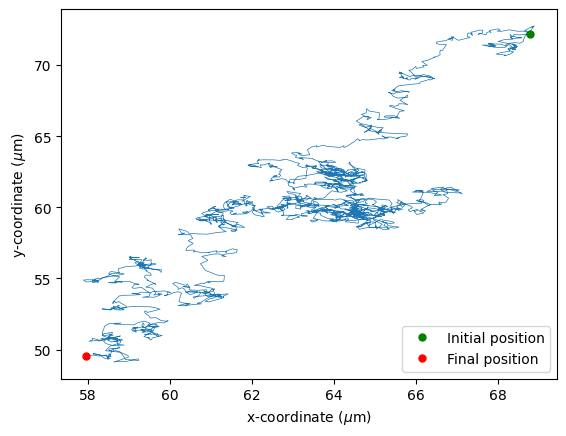

In [ ]:

x_um = threeum_bead1_coordinates[:, 0]
y_um = threeum_bead1_coordinates[:, 1]

# Plot the points
plt.plot(x_um, y_um, linewidth=0.5)
plt.plot(x_um[0],y_um[0], marker='o', markersize=5, color='green', linestyle='None', label='Initial position')
plt.plot(x_um[-1],y_um[-1], marker='o', markersize=5, color='red', linestyle='None', label='Final position')
plt.xlabel('x-coordinate (${\mu}$m)')
plt.ylabel('y-coordinate (${\mu}$m)')
#plt.title('Brownian motion of a 3${\mu}m$ bead in 0.04% CV')
plt.legend(loc='lower right')
# Show the plot
plt.show()

In [ ]:
def calculate_r_squared(coordinates):
    # Extract the first x and y coordinates as references
    x_reference = coordinates[0, 0]
    y_reference = coordinates[0, 1]

    # Initialize an empty array to store squared distances
    r_squared = []

    # Loop through each row of coordinates starting from the second row
    for i in range(1, coordinates.shape[0]):
        # Calculate squared distance using the formula
        squared_distance = (coordinates[i, 0] - x_reference) ** 2 + (coordinates[i, 1] - y_reference) ** 2
        # Append the squared distance to the array
        r_squared.append(squared_distance)

    # Convert the list to a numpy array
    r_squared = np.array(r_squared)

    return r_squared

In [ ]:
def calculate_time_mean(r_squared):
    time_mean_value = []
    running_sum = 0
    for i, value in enumerate(r_squared):
        running_sum += value
        time_mean_value.append(running_sum / (i + 1))
    return time_mean_value

In [ ]:
def calculate_average_displacement(bead_coordinates_list):
    num_beads = len(bead_coordinates_list)
    min_length = min(len(coords) for coords in bead_coordinates_list)
    time_mean_values_list = []

    # Calculate time_mean_value for each bead up to the length of the shortest list
    for bead_coordinates in bead_coordinates_list:
        r_squared = calculate_r_squared(bead_coordinates[:min_length])
        time_mean_values_list.append(calculate_time_mean(r_squared))

    # Calculate average displacement across all beads up to the length of the shortest list
    average_displacement = [0] * min_length
    for time_mean_values in time_mean_values_list:
        for i, value in enumerate(time_mean_values):
            average_displacement[i] += value

    # Divide the sum by the number of beads
    average_displacement = [value / num_beads for value in average_displacement]

    # Remove the last value from average_displacement before returning

    average_displacement.pop()

    return average_displacement


In [ ]:
threemicronbeads = [threeum_bead1_coordinates, threeum_bead2_coordinates, threeum_bead3_coordinates, threeum_bead4_coordinates, threeum_bead5_coordinates]



In [ ]:
oneum_bead1 = '/content/1um brownian_bead1.csv'  
oneum_bead1_coordinates = csv_to_matrix(oneum_bead1)

oneum_bead2 = '/content/1um 2 brown_bead1.csv'
oneum_bead2_coordinates = csv_to_matrix(oneum_bead2)

oneum_bead3 = '/content/1um 3rd brown_bead1.csv'
oneum_bead3_coordinates = csv_to_matrix(oneum_bead3)

oneum_bead4 = '/content/1um 3rd brown_bead2.csv'
oneum_bead4_coordinates = csv_to_matrix(oneum_bead4)

oneum_bead5 = '/content/1um 3rd brown_bead3.csv'
oneum_bead5_coordinates = csv_to_matrix(oneum_bead5)

onemicronbeads = [oneum_bead1_coordinates, oneum_bead2_coordinates, oneum_bead3_coordinates, oneum_bead4_coordinates, oneum_bead5_coordinates]

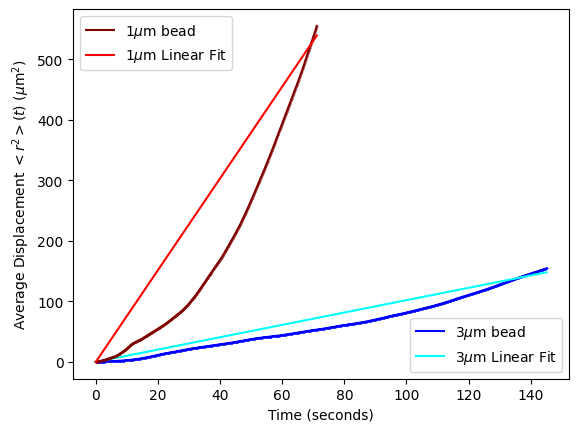

In [ ]:
average_displacement_1um = calculate_average_displacement(onemicronbeads)
average_displacement_3um = calculate_average_displacement(threemicronbeads)

# Create arrays of indices for the x-axis
time_threemicron = np.arange(len(average_displacement_3um))/15
time_one_micron = np.arange(len(average_displacement_1um))/15

# Perform linear regression
slopeone, _ = np.polyfit(time_one_micron, average_displacement_1um, deg=1)
slopethree, _ = np.polyfit(time_threemicron, average_displacement_3um, deg=1)

# Plot the data and linear regression fits
plt.plot(time_threemicron, average_displacement_3um, color='Blue', marker='o', markersize=0.2, markerfacecolor='none', label='3$\mu$m bead')
plt.plot(time_threemicron, slopethree * time_threemicron, color='Cyan', label='3$\mu$m Linear Fit')

plt.plot(time_one_micron[:len(time_threemicron)], average_displacement_1um[:len(time_threemicron)], color='Maroon', marker='o', markersize=0.2, markerfacecolor='none', label='1$\mu$m bead')
plt.plot(time_one_micron, slopeone * time_one_micron, color='Red', label='1$\mu$m Linear Fit')

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Average Displacement $<r^2>(t)$ ($\mu$m$^2$)')
#plt.title('Average Displacement of 3 and 1 $\mu$m Polystyrene Beads')

# Create separate legends for 1 micron and 3 micron beads and their linear fits
legend1 = plt.legend(handles=[plt.Line2D([0], [0], color='Maroon', label='1$\mu$m bead'),
                               plt.Line2D([0], [0], color='Red', label='1$\mu$m Linear Fit')],
                      loc='upper left')

legend2 = plt.legend(handles=[plt.Line2D([0], [0], color='Blue', label='3$\mu$m bead'),
                               plt.Line2D([0], [0], color='Cyan', label='3$\mu$m Linear Fit')],
                      loc='lower right')

# Add each legend instance to the plot
plt.gca().add_artist(legend1)
# Show the plot
plt.show()


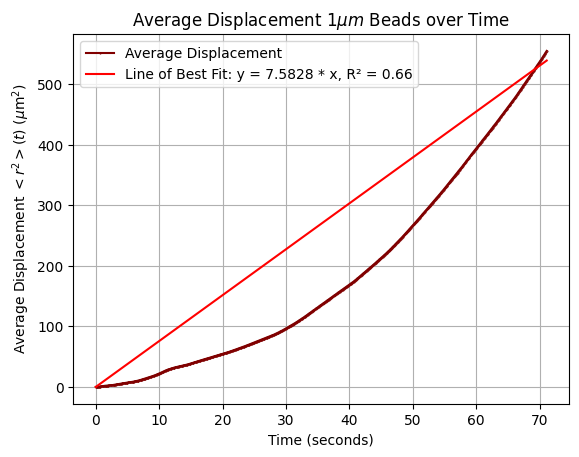

In [ ]:
x_values = np.arange(len(average_displacement_1um)) / 15

# Perform linear regression
slope, _ = np.polyfit(x_values, average_displacement_1um, deg=1)

# Calculate predicted values using the linear fit
predicted_values = slope * x_values

# Calculate the R^2 value
residuals = average_displacement_1um - predicted_values
ss_residual = np.sum(residuals ** 2)
ss_total = np.sum((average_displacement_1um - np.mean(average_displacement_1um)) ** 2)
r_squared = 1 - (ss_residual / ss_total)

# Plot average displacement against time
plt.plot(x_values, average_displacement_1um, marker='o', color='Maroon', markersize=0.5, markerfacecolor='none', label='Average Displacement')
plt.xlabel('Time (seconds)')
plt.ylabel('Average Displacement $<r^2>(t)$ ($\mu$m$^2$)')
plt.title('Average Displacement 1${\mu}m$ Beads over Time')

# Plot the line of best fit
plt.plot(x_values, predicted_values, 'r-', label=f'Line of Best Fit: y = {slope:.4f} * x, R² = {r_squared:.2f}')

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [ ]:
x_values = np.arange(len(average_displacement_1um)) / 15

# Perform linear regression
slope, intercept = np.polyfit(x_values, average_displacement_1um, deg=1)

# Calculate predicted values using the linear fit
predicted_values = slope * x_values

# Calculate residuals
residuals = average_displacement_1um - predicted_values

# Calculate the sum of squares of residuals
ss_residual = np.sum(residuals ** 2)

# Calculate the standard error of the slope
std_error_slope = np.sqrt(ss_residual / (len(x_values) - 2)) / np.sqrt(np.sum((x_values - np.mean(x_values)) ** 2))

# Calculate margin of error (95% confidence interval)
margin_of_error = 1.96 * std_error_slope  # For a 95% confidence interval

# Print standard error of the slope and margin of error
print(f"Standard Error of the Slope: {std_error_slope:.4f}")
print(f"Margin of Error: ±{margin_of_error:.4f}")

Standard Error of the Slope: 0.1408
Margin of Error: ±0.2760


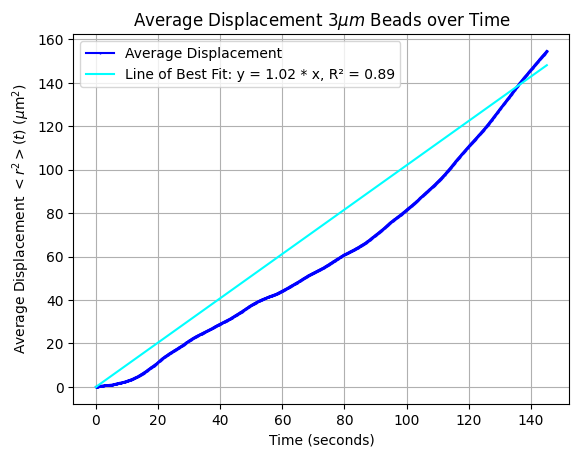

In [ ]:
x_values = np.arange(len(average_displacement_3um)) / 15

# Perform linear regression
slope, _ = np.polyfit(x_values, average_displacement_3um, deg=1)

# Calculate predicted values using the linear fit
predicted_values = slope * x_values

# Calculate the R^2 value
residuals = average_displacement_3um - predicted_values
ss_residual = np.sum(residuals ** 2)
ss_total = np.sum((average_displacement_3um - np.mean(average_displacement_3um)) ** 2)
r_squared = 1 - (ss_residual / ss_total)

# Plot average displacement against time
plt.plot(x_values, average_displacement_3um, marker='o', color='Blue', markersize=0.5, markerfacecolor='none', label='Average Displacement')
plt.xlabel('Time (seconds)')
plt.ylabel('Average Displacement $<r^2>(t)$ ($\mu$m$^2$)')
plt.title('Average Displacement 3${\mu}m$ Beads over Time')

# Plot the line of best fit
plt.plot(x_values, predicted_values, color='Cyan', label=f'Line of Best Fit: y = {slope:.2f} * x, R² = {r_squared:.2f}')

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [ ]:
x_values = np.arange(len(average_displacement_3um)) / 15

# Perform linear regression
slope, intercept = np.polyfit(x_values, average_displacement_3um, deg=1)

# Calculate predicted values using the linear fit
predicted_values = slope * x_values

# Calculate residuals
residuals = average_displacement_3um - predicted_values

# Calculate the sum of squares of residuals
ss_residual = np.sum(residuals ** 2)

# Calculate the standard error of the slope
std_error_slope = np.sqrt(ss_residual / (len(x_values) - 2)) / np.sqrt(np.sum((x_values - np.mean(x_values)) ** 2))

# Calculate margin of error (95% confidence interval)
margin_of_error = 1.96 * std_error_slope  # For a 95% confidence interval

# Print standard error of the slope and margin of error
print(f"Slope: {slope:.4f}")
print(f"Standard Error of the Slope: {std_error_slope:.4f}")
print(f"Margin of Error: ±{margin_of_error:.4f}")

Slope: 1.0207
Standard Error of the Slope: 0.0074
Margin of Error: ±0.0144


Holding force calculation section


In [3]:
held_bead = '/content/laser4_Held_bead.csv'
held_bead_coordinates = csv_to_matrix(held_bead)

In [4]:
def calculate_speed(coordinates):
    frames_per_second = 15

    # Initialize an empty array to store instantaneous speed
    speed = [0]

    # Loop through each row of coordinates starting from the second row
    for i in range(1, coordinates.shape[0]):
        # Calculate squared distance using the formula
        instantaneous_speed_squared = (coordinates[i, 0] - coordinates[i-1, 0]) ** 2 + (coordinates[i, 1] - coordinates[i-1, 1]) ** 2
        # Append the squared distance to the array
        speed.append(instantaneous_speed_squared)

    # Convert the list to a numpy array, convert speed^2 to um/s and take square-root, then lastly convert um/s to m/s
    speed = (np.sqrt(np.array(speed)*15))*1e-6

    return speed

In [8]:
len(held_bead_coordinates)/15

31.0

In [9]:
31*15

465

In [5]:
def calculate_stokes_force(effective_viscosity, radius_of_bead, max_speed):

    # Calculate the Stokes force
    stokes_force = 6 * math.pi * effective_viscosity * radius_of_bead * max_speed

    return stokes_force

In [6]:
held_speed = calculate_speed(held_bead_coordinates)   #calculcate all speeds of the bead while it is held by the laser
max_held_speed = max(held_speed)                      #extract the maximum speed during the time it was held

calculate_stokes_force(570.38e-6, 1.5e-6, max_held_speed)




1.443162461675425e-13

In [ ]:
1.44316246e-13*(7.96/570.38)

2.0140210353799223e-15

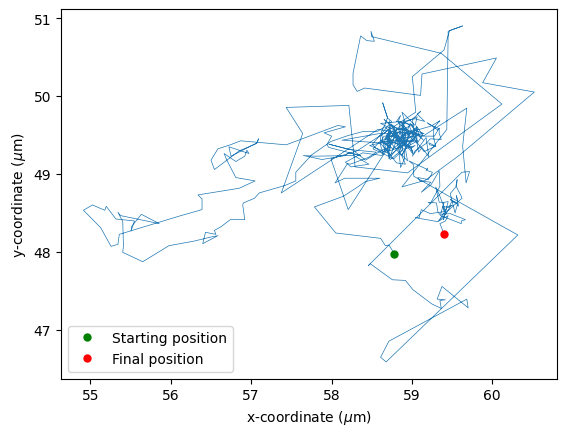

In [ ]:
x_um = held_bead_coordinates[:, 0]
y_um = held_bead_coordinates[:, 1]

# Plot the points
plt.plot(x_um, y_um, linewidth=0.5)
plt.plot(x_um[0],y_um[0], marker='o', markersize=5, color='green', linestyle='None', label='Starting position')
plt.plot(x_um[-1],y_um[-1], marker='o', markersize=5, color='red', linestyle='None', label='Final position')
plt.xlabel('x-coordinate (${\mu}$m)')
plt.ylabel('y-coordinate (${\mu}$m)')
#plt.title('Motion of a 3${\mu}$m bead held by a 658nm laser')
plt.legend(loc='lower left')
# Show the plot
plt.show()